In [67]:
import pandas as pd
from datetime import datetime
from collections import Counter
import numpy as np

import requests
from bs4 import BeautifulSoup
import re

# req = requests.get("https://arxiv.org/")
# soup = BeautifulSoup(req.text, 'html.parser')
            
data = pd.read_csv('/Users/tuan/Desktop/vinuni-stuff/VinUni-PhD-Courses/comp5120-datavis/projects/project02/arxiv05_v2.csv')
data
# data

,Unnamed: 0.1,Unnamed: 0,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,0,0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CV, cs.AI, cs.CL",3,2024-05-03,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,1,1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,2024-05-03,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,2,2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.LG, cs.AI, cs.CL",3,2024-05-03,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,3,3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.AI, cs.CL",2,2024-05-03,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,4,4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.LG, cs.AI, cs.CL",3,2024-05-03,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,2023-11-03,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,49996,49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,2023-11-03,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,49997,49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"cs.LG, stat.ML",2,2023-11-03,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,49998,49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,2023-11-03,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [68]:
req = requests.get("https://arxiv.org/")
soup = BeautifulSoup(req.text, 'html.parser')
# Find all <a> tags with href containing "/recent"
recent_links = soup.find_all('a', href=lambda href: href and '/recent' in href)
topics = {}
# Print the links
for link in recent_links:
    # print(link['href'])
    topics[f"https://arxiv.org{link['href']}"] = link.text
    # if link.text == 'recent':
        # print(link)
print(len(topics))

# topics.keys()
topics_name = {}
for k, v in topics.items():
    if v != 'recent':
        topics_name[k.split('/')[-2]] = v
    # else:
    #     print(k, v)
# sorted topics_name by(key, value) in ascending order
topics_name = dict(sorted(topics_name.items(), key=lambda item: (item[0], item[1]) ))
print(topics_name)

166
{'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics', 'astro-ph.EP': 'Earth and Planetary Astrophysics', 'astro-ph.GA': 'Astrophysics of Galaxies', 'astro-ph.HE': 'High Energy Astrophysical Phenomena', 'astro-ph.IM': 'Instrumentation and Methods for Astrophysics', 'astro-ph.SR': 'Solar and Stellar Astrophysics', 'cond-mat.dis-nn': 'Disordered Systems and Neural Networks', 'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics', 'cond-mat.mtrl-sci': 'Materials Science', 'cond-mat.other': 'Other Condensed Matter', 'cond-mat.quant-gas': 'Quantum Gases', 'cond-mat.soft': 'Soft Condensed Matter', 'cond-mat.stat-mech': 'Statistical Mechanics', 'cond-mat.str-el': 'Strongly Correlated Electrons', 'cond-mat.supr-con': 'Superconductivity', 'cs.AI': 'Artificial Intelligence', 'cs.AR': 'Hardware Architecture', 'cs.CC': 'Computational Complexity', 'cs.CE': 'Computational Engineering, Finance, and Science', 'cs.CG': 'Computational Geometry', 'cs.CL': 'Computation and Language', 'cs.CR': 'Cryp

In [69]:
# print column name
print(data.columns)
# remove columns: ['Unnamed: 0.1', 'Unnamed: 0']
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data

Index(['Unnamed: 0.1', 'Unnamed: 0', 'authors', 'authors_count', 'id',
       'summary', 'tags', 'tags_count', 'time', 'date', 'title', 'weight'],
      dtype='object')


,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CV, cs.AI, cs.CL",3,2024-05-03,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,2024-05-03,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.LG, cs.AI, cs.CL",3,2024-05-03,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.AI, cs.CL",2,2024-05-03,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.LG, cs.AI, cs.CL",3,2024-05-03,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...
49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,2023-11-03,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,2023-11-03,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"cs.LG, stat.ML",2,2023-11-03,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,2023-11-03,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [70]:
# data tags change
data_tags = []
data_tags_count = []

# data['tags']
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    acc_tag = [tag for tag in split_tag if tag in topics_name]
    # get a unique list of tags
    acc_tag = sorted(list(set(acc_tag)))
    acc_tag_str = ', '.join(tag for tag in acc_tag)
    # print(acc_tag_str)
    # break
    if len(acc_tag_str) == 0:
        print(tag_row)
    data_tags.append(acc_tag_str)
    data_tags_count.append(len(acc_tag))

data['tags'] = data_tags
data['tags_count'] = data_tags_count
# write to csv without index
data.to_csv('/Users/tuan/Desktop/vinuni-stuff/VinUni-PhD-Courses/comp5120-datavis/projects/project02/arxiv05_v2.csv', index=False)


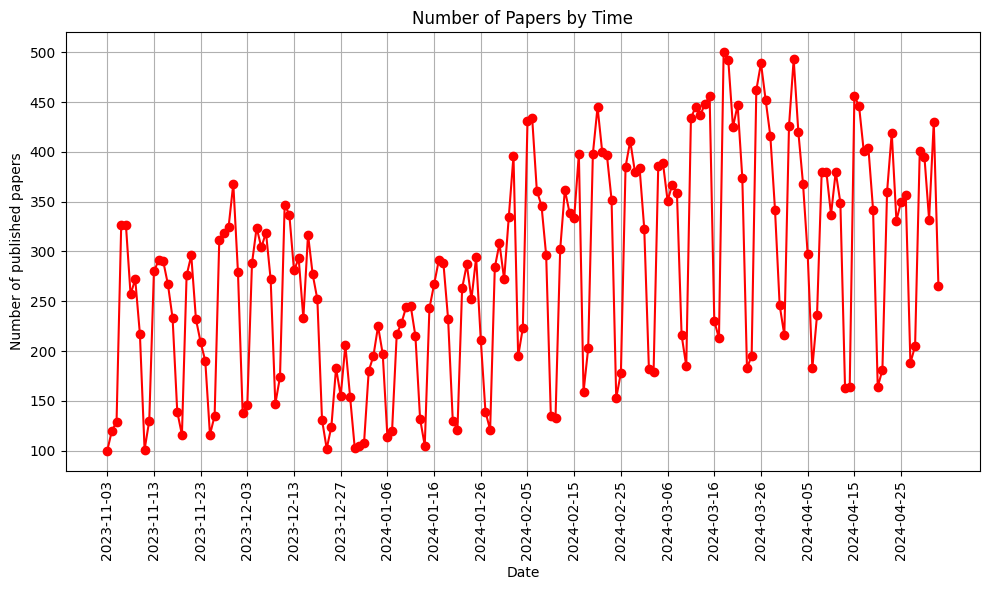

In [71]:
# Group by 'time' and count the number of collections for each time
df = pd.DataFrame(data)
grouped_df = df.groupby('time').size().reset_index(name='count')

# Sort by 'time'
sorted_df = grouped_df.sort_values('time').reset_index(drop=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sorted_df.index, sorted_df['count'], marker='o', color='r')
plt.xlabel('Date')
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Time')
# only show every 10th label
plt.xticks(sorted_df.index[::10], sorted_df['time'][::10], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_day.pdf')
plt.show()

In [ ]:
# # plot tags by time
# tags_acc = {}
# for tag_row in data['tags']:
#     split_tag = tag_row.split(', ')
#     for tag in split_tag:
        


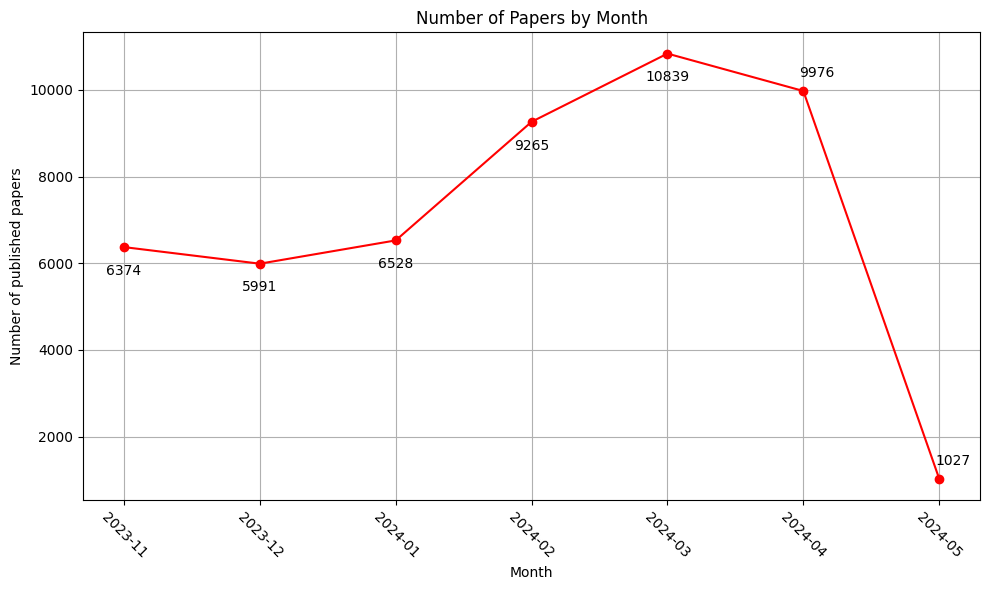

In [72]:
# group the paper by month: 7 digits in 'time' column
df['month'] = df['time'].str[:7]
grouped_df = df.groupby('month').size().reset_index(name='count')
sorted_df = grouped_df.sort_values('month').reset_index(drop=True)


# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sorted_df.index, sorted_df['count'], marker='o', color='r')
# adding value on top of each bar
for i, txt in enumerate(sorted_df['count']):
    # plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(0,-20), ha='center')
    if i <= 4:
        plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(10, 10), ha='center')
plt.xlabel('Month')
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Month')
plt.xticks(sorted_df.index, sorted_df['month'], rotation=-45) 
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_month.pdf')
plt.show()

In [ ]:
tag_subject = {
    'cs': 'Computer Science',
    'eess': 'Electrical Engineering and Systems Science',
    'math': 'Mathematics',
    'physics': 'Physics',
    'q-bio': 'Quantitative Biology',
    'q-fin': 'Quantitative Finance',
    'stat': 'Statistics'
    
}

In [59]:
subject_abv = {}
for idx, (k, v) in enumerate(topics_name.items()):
    # print(idx, k, v)
    sabv = k.split('.')[0]
    if sabv not in subject_abv:
        subject_abv[sabv] = []
    subject_abv[sabv].append(v)
for k, v in subject_abv.items():
    print(k, len(v), v)

subject_names = {
    'Physics': ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics', 'quant-ph'],
    'Computer Science': ['cs'],
    'Mathematics': ['math'],
    'Statistics': ['stat'],
    'Quantitative Biology': ['q-bio'],
    'Quantitative Finance': ['q-fin'],
    'Electrical Engineering and Systems Science': ['eess'],
    'Economics': ['econ'],
}
# mapping from each element in value in subject_name to key
subject_name = {}
for k, v in subject_names.items():
    for i in v:
        subject_name[i] = k
print(subject_name)

astro-ph 6 ['Cosmology and Nongalactic Astrophysics', 'Earth and Planetary Astrophysics', 'Astrophysics of Galaxies', 'High Energy Astrophysical Phenomena', 'Instrumentation and Methods for Astrophysics', 'Solar and Stellar Astrophysics']
cond-mat 9 ['Disordered Systems and Neural Networks', 'Mesoscale and Nanoscale Physics', 'Materials Science', 'Other Condensed Matter', 'Quantum Gases', 'Soft Condensed Matter', 'Statistical Mechanics', 'Strongly Correlated Electrons', 'Superconductivity']
cs 40 ['Artificial Intelligence', 'Hardware Architecture', 'Computational Complexity', 'Computational Engineering, Finance, and Science', 'Computational Geometry', 'Computation and Language', 'Cryptography and Security', 'Computer Vision and Pattern Recognition', 'Computers and Society', 'Databases', 'Distributed, Parallel, and Cluster Computing', 'Digital Libraries', 'Discrete Mathematics', 'Data Structures and Algorithms', 'Emerging Technologies', 'Formal Languages and Automata Theory', 'General L

In [136]:
# print(subject_name)
data_by_subject = {k: 0 for k in subject_names.keys()}

for idx, row in df.iterrows():
    tags = row['tags'].split(', ')
    # print(tags)
    dict_pp = {}
    for tag in tags:
        tag2 = tag.split('.')[0]
        tag3 = subject_name[tag2]
        dict_pp[tag3] = 1
    for k, v in dict_pp.items():
        data_by_subject[k] += 1
print(data_by_subject)

{'Physics': 1487, 'Computer Science': 50000, 'Mathematics': 2737, 'Statistics': 4100, 'Quantitative Biology': 922, 'Quantitative Finance': 243, 'Electrical Engineering and Systems Science': 5067, 'Economics': 176}


In [89]:
# change the key: Electrical Engineering and Systems Science to Electrical Engineering
data_by_subject['Electrical Engineering'] = data_by_subject.pop('Electrical Engineering and Systems Science')

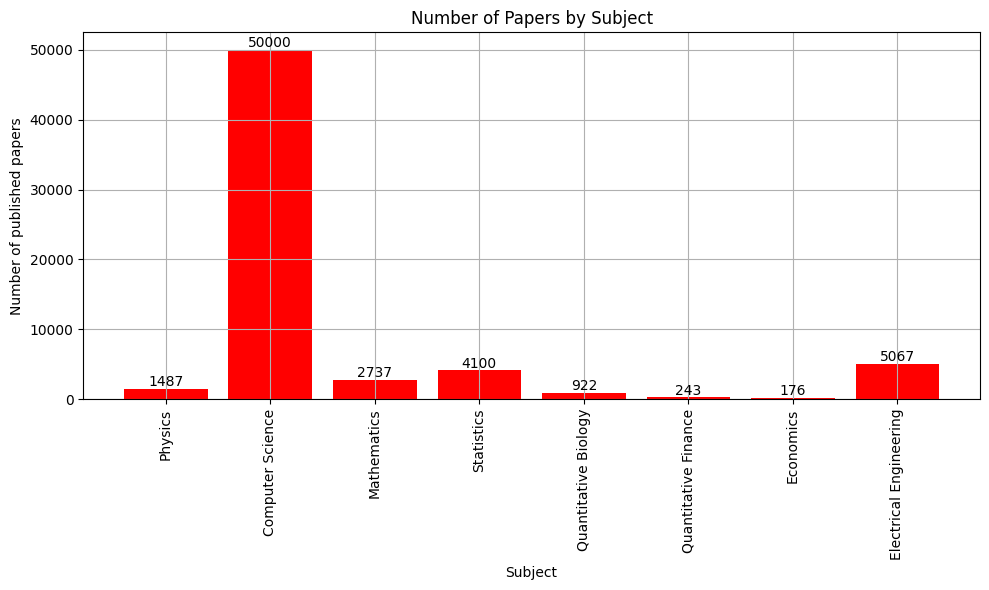

In [93]:
# plot this data {'Physics': 1487, 'Computer Science': 50000, 'Mathematics': 2737, 'Statistics': 4100, 'Quantitative Biology': 922, 'Quantitative Finance': 243, 'Electrical Engineering and Systems Science': 5067, 'Economics': 176}
# with key is x-axis, value is y-axis
data_by_subject['Electrical Engineering'] = data_by_subject.pop('Electrical Engineering and Systems Science')
plt.figure(figsize=(10, 6))
plt.bar(data_by_subject.keys(), data_by_subject.values(), color='r')
# adding value into top of each bar
for i, txt in enumerate(data_by_subject.values()):
    plt.annotate(txt, (list(data_by_subject.keys())[i], list(data_by_subject.values())[i]), textcoords="offset points", xytext=(0,2), ha='center')
plt.xlabel('Subject')
plt.xticks(rotation=90)
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Subject')
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_subject.pdf')
plt.show()
# 25 * 2000 pages



In [109]:
sub_list = list(subject_names.keys())
# remove 'Computer Science' from the list and sort the list
sub_list.remove('Computer Science')
sub_list = sorted(sub_list)
print(sub_list)
heatmap_data = np.zeros((len(sub_list), len(sub_list)))

for idx, row in df.iterrows():
    tags = row['tags'].split(', ')
    dict_pp = {}
    for tag in tags:
        tag2 = tag.split('.')[0]
        tag3 = subject_name[tag2]
        dict_pp[tag3] = 1
    for k, v in dict_pp.items():
        for k2, v2 in dict_pp.items():
            if k == k2:
                continue
            if k in sub_list and k2 in sub_list:
                heatmap_data[sub_list.index(k), sub_list.index(k2)] += 1
sub_list[sub_list.index('Electrical Engineering and Systems Science')] = 'Electrical Engineering'
print(heatmap_data)

['Economics', 'Electrical Engineering and Systems Science', 'Mathematics', 'Physics', 'Quantitative Biology', 'Quantitative Finance', 'Statistics']
[[   0.    2.   18.    5.    0.   60.   71.]
 [   2.    0.  335.  160.  132.    3.  181.]
 [  18.  335.    0.  125.   28.   11. 1001.]
 [   5.  160.  125.    0.   77.    5.  160.]
 [   0.  132.   28.   77.    0.    0.   90.]
 [  60.    3.   11.    5.    0.    0.   36.]
 [  71.  181. 1001.  160.   90.   36.    0.]]


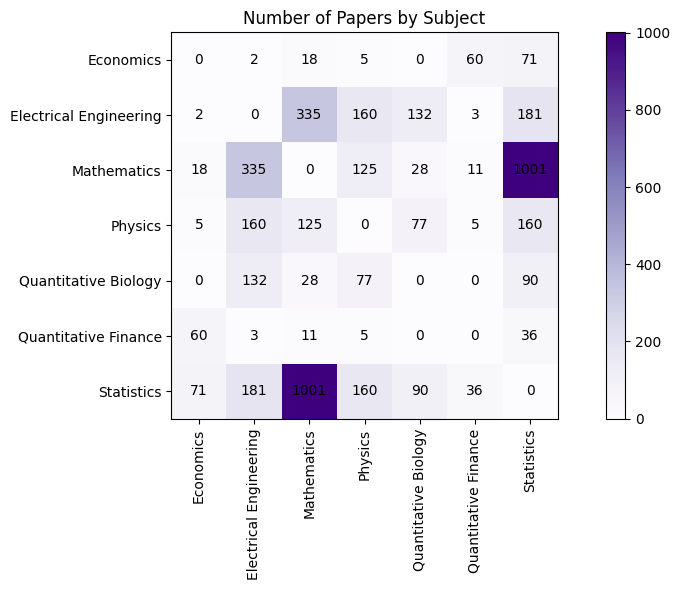

In [125]:
# plot heatmap
# replace 'Electrical Engineering and Systems Science' by 'Electrical Engineering' in sub_list
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='Purples', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(sub_list)), sub_list, rotation=90)
plt.yticks(range(len(sub_list)), sub_list)
# adding value into each cell of heatmap with integer format
for i in range(len(sub_list)):
    for j in range(len(sub_list)):
        plt.text(j, i, int(heatmap_data[i, j]), ha='center', va='center', color='black')
# plt.xlabel('Subject')
# plt.ylabel('Subject')
plt.title('Number of Papers by Subject')
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_subject_heatmap.pdf')
plt.show()

In [180]:
# data_tag_distinct = df['tags'].str.split(', ').explode().value_counts()
# data_tag_distinct
physic_abv = ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics', 'quant-ph']

data_field_list = []
for tag_row in df['tags']:
    split_tag = tag_row.split(', ')
    data_pp = {}
    for tag in split_tag:
        tag2 = tag.split('.')[0]
        if tag2 in physic_abv:
            tag2 = 'physics'
        # tag3 = subject_name[tag2]
        data_pp[tag2] = 1
    field_text = ', '.join(list(sorted(data_pp.keys())))
    data_field_list.append(field_text)
    # print(list(sorted(data_pp.keys())))
    # break
    # data_field_list.extend(split_tag)
df['subject'] = data_field_list
df.to_csv('/Users/tuan/Desktop/vinuni-stuff/VinUni-PhD-Courses/comp5120-datavis/projects/project02/arxiv05_v2.csv', index=False)
# data_field_list = sorted(list(set(data_field_list)))

# data_tag_list_distinct = df['tags'].unique()
# print(data_tag_list_distinct)
# print(len(data_tag_list_distinct))


In [181]:

data_tag_distinct = df['subject'].value_counts()
# print(data_tag_distinct)
# sort data_tag_distinct by key
data_tag_by_key = dict(sorted(data_tag_distinct.items(), key=lambda item: (item[0], item[1]) ))
for k, v in data_tag_by_key.items():
    print(k, v)

cs 37605
cs, econ 49
cs, econ, eess, q-fin 2
cs, econ, math 2
cs, econ, math, stat 16
cs, econ, physics 2
cs, econ, physics, q-fin 3
cs, econ, q-fin 47
cs, econ, q-fin, stat 8
cs, econ, stat 47
cs, eess 4334
cs, eess, math 270
cs, eess, math, physics 3
cs, eess, math, q-bio 2
cs, eess, math, stat 60
cs, eess, physics 145
cs, eess, physics, q-bio 6
cs, eess, physics, stat 6
cs, eess, q-bio 123
cs, eess, q-bio, stat 1
cs, eess, q-fin 1
cs, eess, stat 114
cs, math 1347
cs, math, physics 86
cs, math, physics, q-bio 3
cs, math, physics, stat 33
cs, math, q-bio 17
cs, math, q-bio, stat 6
cs, math, q-fin 6
cs, math, q-fin, stat 5
cs, math, stat 881
cs, physics 1018
cs, physics, q-bio 59
cs, physics, q-bio, stat 9
cs, physics, q-fin 2
cs, physics, stat 112
cs, q-bio 622
cs, q-bio, stat 74
cs, q-fin 146
cs, q-fin, stat 23
cs, stat 2705


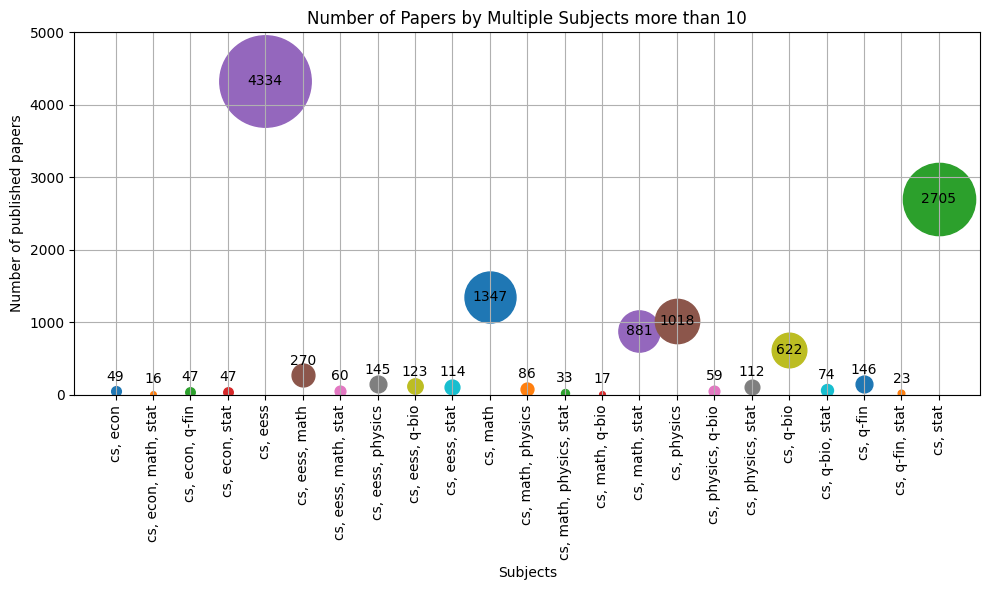

In [199]:
# scatter plot for each subject
# plt.figure(figsize=(10, 6))
# for idx, (k, v) in enumerate(data_tag_by_key.items()):
#     plt.scatter(idx, v, label=k)
# plt.xlabel('Subject')
# plt.ylabel('Number of published papers')
# plt.title('Number of Papers by Subject')
# plt.xticks(range(len(data_tag_by_key)), data_tag_by_key.keys(), rotation=90)
# # plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('./pdf/number_of_papers_by_subject_scatter.pdf')
# plt.show()
# filter value > 20, remove 'cs' from the list, replace 'cs' in key by ''
data_filter = {k: v for k, v in data_tag_by_key.items() if k != 'cs' and v > 10}
# data_filter = data_filter.pop('cs')
# shot bubble chart
plt.figure(figsize=(10, 6))
for idx, (k, v) in enumerate(data_filter.items()):   
    plt.scatter(idx, v, s=v, label=k)
    # adding value on top of each bubble
    if v > 500:
        plt.text(idx, v, v, ha='center', va='center')
    else:
        # put the value on top of the bubble + 10
        plt.text(idx, v+200, v, ha='center', va='center')

plt.xlabel('Subjects')
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Multiple Subjects more than 10')
plt.xticks(range(len(data_filter)), data_filter.keys(), rotation=90)
# extend the y axis to 5000
plt.ylim(0, 5000)
# set legend outside of the plot
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_subject_bubble.pdf')
plt.show()


In [188]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 15.2 MB/s eta 0:00:0000:0100:01


In [189]:
# using plotly to show the bubble chart
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for k, v in data_filter.items():
    fig.add_trace(go.Scatter(x=[k], y=[v], mode='markers', marker_size=[v], name=k))
fig.update_layout(title='Number of Papers by Multiple Subjects more than 10',
                  xaxis_title='Subject',
                  yaxis_title='Number of published papers',
                  showlegend=False)
fig.show()


{'astro-ph': 'Physics', 'cond-mat': 'Physics', 'gr-qc': 'Physics', 'hep-ex': 'Physics', 'hep-lat': 'Physics', 'hep-ph': 'Physics', 'hep-th': 'Physics', 'math-ph': 'Physics', 'nlin': 'Physics', 'nucl-ex': 'Physics', 'nucl-th': 'Physics', 'physics': 'Physics', 'quant-ph': 'Physics', 'cs': 'Computer Science', 'math': 'Mathematics', 'stat': 'Statistics', 'q-bio': 'Quantitative Biology', 'q-fin': 'Quantitative Finance', 'eess': 'Electrical Engineering and Systems Science', 'econ': 'Economics'}
Physics 1487 Counter({'2024-02-27': 22, '2024-04-12': 17, '2024-02-21': 17, '2023-12-05': 17, '2024-04-26': 16, '2024-04-23': 16, '2024-03-04': 16, '2023-12-14': 16, '2023-12-07': 16, '2023-11-30': 16, '2023-11-07': 16, '2024-04-15': 15, '2024-04-01': 15, '2024-03-07': 15, '2024-04-19': 14, '2024-04-05': 14, '2024-03-18': 14, '2024-03-15': 14, '2024-03-06': 14, '2024-01-30': 14, '2023-12-11': 14, '2023-12-06': 14, '2023-11-29': 14, '2023-11-13': 14, '2024-04-11': 13, '2024-04-09': 13, '2024-03-13': 13

ConversionError: Failed to convert value(s) to axis units: dict_keys(['2023-11-03', '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10', '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03'])

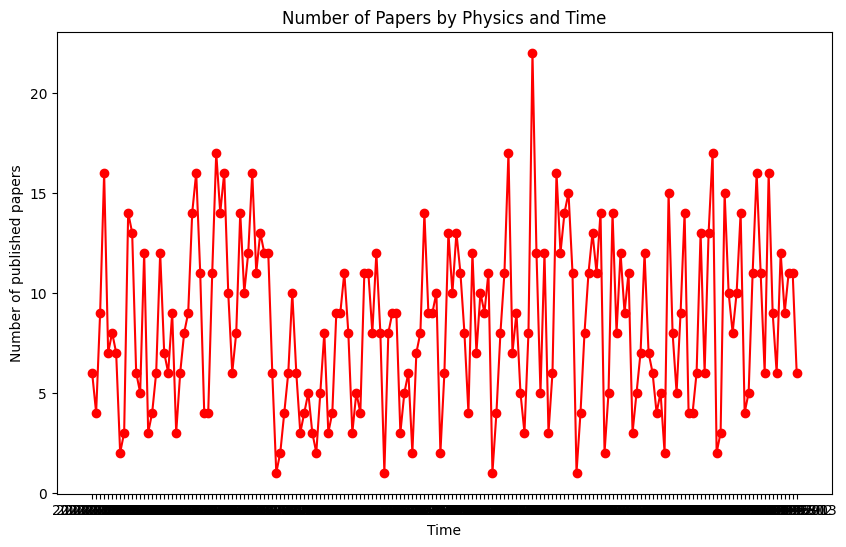

In [141]:
# # # plot tags by time
# tags_subject_time = {k: [] for k in subject_names.keys()}
# print(subject_name)

# for idx, row in df.iterrows():
#     tag_row = row['tags']
#     tag_time = row['time']
#     split_tag = tag_row.split(', ')
#     dict_pp = {}
#     for tag in split_tag:
#         tag2 = tag.split('.')[0]
#         tag3 = subject_name[tag2]
#         dict_pp[tag3] = 1
#     # print(dict_pp)
#     for k, v in dict_pp.items():
#         tags_subject_time[k].append(tag_time)
#     # if idx == 20:
#     #     break
# # from collections import Counter
# keys_plot = sorted(df['time'].unique())

# for k, v in tags_subject_time.items():
#     print(k, len(v), Counter(v))
#     list_num = dict(Counter(v))
#     # sort the dictionary by key
#     list_num = dict(sorted(list_num.items(), key=lambda item: (item[0], item[1])))
#     # print(list_num)
#     # break
#     # plot the number of papers by subject and time
#     plt.figure(figsize=(10, 6))
#     plt.plot(list_num.keys(), list_num.values(), marker='o', color='r')
#     plt.xlabel('Time')
#     plt.ylabel('Number of published papers')
#     plt.title(f'Number of Papers by {k} and Time')
#     # plt.xticks(range(len(keys_plot)), keys_plot, rotation=-45)
#     # only show every 10th label
#     plt.xticks(list_num.keys(), list_num.keys(), rotation=-45)
#     plt.grid(True)
#     plt.tight_layout()
#     # plt.savefig(f'./pdf/number_of_papers_by_{k}_and_time.pdf')
#     plt.show()

# # for k, v in tags_subject_time.items():
# #     print(k, len(v), Counter(v))
# #     list_num = dict(Counter(v))
# #     # sort the dictionary by key
# #     list_num = dict(sorted(list_num.items(), key=lambda item: (item[0], item[1])))


# # print(len(df))


In [138]:
sorted(df['time'].unique())

['2023-11-03',
 '2023-11-04',
 '2023-11-05',
 '2023-11-06',
 '2023-11-07',
 '2023-11-08',
 '2023-11-09',
 '2023-11-10',
 '2023-11-11',
 '2023-11-12',
 '2023-11-13',
 '2023-11-14',
 '2023-11-15',
 '2023-11-16',
 '2023-11-17',
 '2023-11-18',
 '2023-11-19',
 '2023-11-20',
 '2023-11-21',
 '2023-11-22',
 '2023-11-23',
 '2023-11-24',
 '2023-11-25',
 '2023-11-26',
 '2023-11-27',
 '2023-11-28',
 '2023-11-29',
 '2023-11-30',
 '2023-12-01',
 '2023-12-02',
 '2023-12-03',
 '2023-12-04',
 '2023-12-05',
 '2023-12-06',
 '2023-12-07',
 '2023-12-08',
 '2023-12-09',
 '2023-12-10',
 '2023-12-11',
 '2023-12-12',
 '2023-12-13',
 '2023-12-14',
 '2023-12-19',
 '2023-12-20',
 '2023-12-21',
 '2023-12-22',
 '2023-12-23',
 '2023-12-24',
 '2023-12-25',
 '2023-12-26',
 '2023-12-27',
 '2023-12-28',
 '2023-12-29',
 '2023-12-30',
 '2023-12-31',
 '2024-01-01',
 '2024-01-02',
 '2024-01-03',
 '2024-01-04',
 '2024-01-05',
 '2024-01-06',
 '2024-01-07',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-

In [ ]:
data_by_subject = {k: 0 for k in subject_names.keys()}

for idx, row in df.iterrows():
    tags = row['tags'].split(', ')
    # print(tags)
    dict_pp = {}
    for tag in tags:
        tag2 = tag.split('.')[0]
        tag3 = subject_name[tag2]
        dict_pp[tag3] = 1
    for k, v in dict_pp.items():
        data_by_subject[k] += 1
print(data_by_subject)

In [62]:
# data tags change
data_tags = []
data_tags_count = []

# data['tags']
for tag_row in df['tags']:
    split_tag = tag_row.split(', ')
    acc_tag = [tag for tag in split_tag if tag in topics_name]
    # get a unique list of tags
    acc_tag = sorted(list(set(acc_tag)))
    acc_tag_str = ', '.join(tag for tag in acc_tag)
    print(acc_tag_str)
    break
    if len(acc_tag_str) == 0:
        print(tag_row)
    data_tags.append(acc_tag_str)
    data_tags_count.append(len(acc_tag))

df['tags'] = data_tags
df['tags_count'] = data_tags_count


cs.AI, cs.CL, cs.CV


In [7]:
# print min and max date
print(data['time'].min(), data['time'].max(), len(data))

# show number of papers by group time with format: YYYY-MM-DD by counting
data_count = data.groupby('time').count()
data_count

2023-11-03 2024-05-03 50000


,authors,authors_count,id,summary,tags,tags_count,date,title,weight
time,,,,,,,,,
2023-11-03,100,100,100,100,100,100,100,100,100
2023-11-04,120,120,120,120,120,120,120,120,120
2023-11-05,129,129,129,129,129,129,129,129,129
2023-11-06,327,327,327,327,327,327,327,327,327
2023-11-07,327,327,327,327,327,327,327,327,327
...,...,...,...,...,...,...,...,...,...
2024-04-29,401,401,401,401,401,401,401,401,401
2024-04-30,395,395,395,395,395,395,395,395,395
2024-05-01,332,332,332,332,332,332,332,332,332


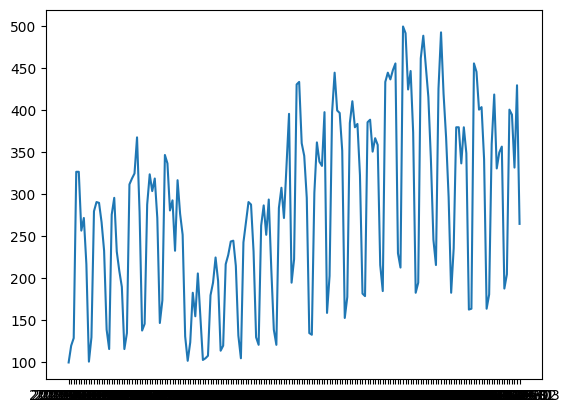

In [14]:
# plot data_count for data['authors'] with index start from 0
plt.plot(data_count['authors'])
# plt.xticks(rotation=90)
plt.show()


In [11]:
# plot the figure by ['time', 'author'] using matplotlib
data_count

,authors,authors_count,id,summary,tags,tags_count,date,title,weight
time,,,,,,,,,
2023-11-03,100,100,100,100,100,100,100,100,100
2023-11-04,120,120,120,120,120,120,120,120,120
2023-11-05,129,129,129,129,129,129,129,129,129
2023-11-06,327,327,327,327,327,327,327,327,327
2023-11-07,327,327,327,327,327,327,327,327,327
...,...,...,...,...,...,...,...,...,...
2024-04-29,401,401,401,401,401,401,401,401,401
2024-04-30,395,395,395,395,395,395,395,395,395
2024-05-01,332,332,332,332,332,332,332,332,332


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Find all <a> tags with href containing "/recent"
recent_links = soup.find_all('a', href=lambda href: href and '/recent' in href)
topics = {}
# Print the links
for link in recent_links:
    # print(link['href'])
    topics[f"https://arxiv.org{link['href']}"] = link.text
    if link.text == 'recent':
        print(link)
print(len(topics))

# topics.keys()
topics_name = {}
for k, v in topics.items():
    if v != 'recent':
        topics_name[k.split('/')[-2]] = v
    else:
        print(k, v)
print(topics_name)
# sorted topics_name by(key, value) in ascending order
topics_name = dict(sorted(topics_name.items(), key=lambda item: (item[0], item[1]) ))

In [8]:
len(topics_name)

146

In [9]:
data = pd.read_csv('/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/project02/arxiv05_v2.csv')

,Unnamed: 0,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CL, cs.AI, cs.CV",3,May 03 2024,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,May 03 2024,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.CL, cs.AI, cs.LG",3,May 03 2024,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.CL, cs.AI",2,May 03 2024,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.CL, cs.AI, cs.LG",3,May 03 2024,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,Nov 03 2023,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,Nov 03 2023,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"stat.ML, cs.LG, 68T05",3,Nov 03 2023,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,Nov 03 2023,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [36]:
# data tags change
data_tags = []
data_tags_count = []

# data['tags']
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    acc_tag = [tag for tag in split_tag if tag in topics_name]
    # get a unique list of tags
    acc_tag = list(set(acc_tag))
    acc_tag_str = ', '.join(tag for tag in acc_tag)
    # print(acc_tag_str)
    if len(acc_tag_str) == 0:
        print(tag_row)
    data_tags.append(acc_tag_str)
    data_tags_count.append(len(acc_tag))

data['tags'] = data_tags
data['tags_count'] = data_tags_count

# new_time = []
# for date_str in data['time']:
#     # Convert to datetime object
#     date_obj = datetime.strptime(date_str, "%b %d %Y")

#     # Convert to desired format
#     formatted_date = date_obj.strftime("%Y-%m-%d")

#     # print(formatted_date)
#     new_time.append(formatted_date)

# data['time'] = new_time

# data = data.drop(columns = ['thumb_url', 'utags'])

data.to_csv('./arxiv05_v2.csv', index=True)


In [13]:
data

,Unnamed: 0,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CL, cs.AI, cs.CV",3,2024-05-03,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,2024-05-03,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.CL, cs.AI, cs.LG",3,2024-05-03,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.CL, cs.AI",2,2024-05-03,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.CL, cs.AI, cs.LG",3,2024-05-03,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,2023-11-03,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,2023-11-03,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"stat.ML, cs.LG",2,2023-11-03,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,2023-11-03,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [55]:
data = pd.read_csv('./arxiv2705.csv')

In [14]:
data_cat = []
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    data_cat.extend(split_tag)
    
data_cat_dict = Counter(data_cat)
print(len(data_cat_dict))
# data_dict = data_cat_dict

143


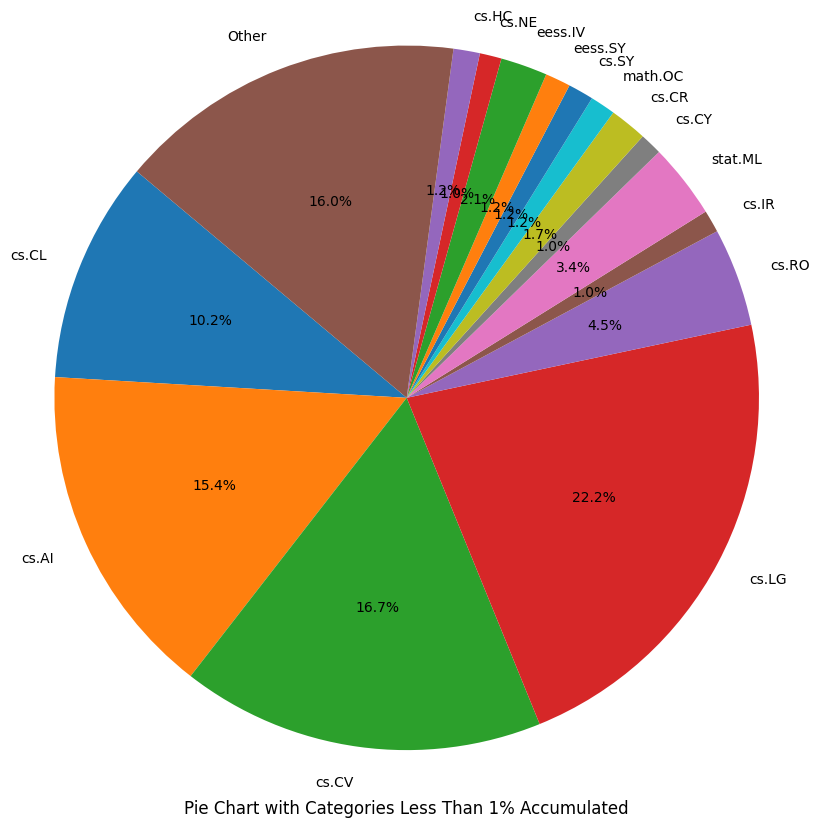

In [18]:
# Calculate total sum of values
total_sum = sum(data_cat_dict.values())

# Separate categories into those above and below 1%
threshold = total_sum * 0.01
above_threshold = {k: v for k, v in data_cat_dict.items() if v >= threshold}
below_threshold = {k: v for k, v in data_cat_dict.items() if v < threshold}

# Sum of values below threshold
other_sum = sum(below_threshold.values())

# Include the "Other" category if there are items below the threshold
if other_sum > 0:
    above_threshold['Other'] = other_sum

# Extracting keys and values for plotting
labels = list(above_threshold.keys())
sizes = list(above_threshold.values())

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Pie Chart with Categories Less Than 1% Accumulated', y=-0.05)

# Display the pie chart
plt.show()

In [21]:
above_threshold.keys()
above_threshold_key = sorted(above_threshold.keys())
above_threshold_key


['Other',
 'cs.AI',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.HC',
 'cs.IR',
 'cs.LG',
 'cs.NE',
 'cs.RO',
 'cs.SY',
 'eess.IV',
 'eess.SY',
 'math.OC',
 'stat.ML']

In [37]:
# cat_keys = sorted(data_cat_dict.keys())

heatmap_cat = np.zeros((len(above_threshold_key), len(above_threshold_key)))
above_threshold_key_list = list(above_threshold.keys())

data_cat = []
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    
    # data_cat.extend(split_tag)
    split_tag = [st if st in above_threshold_key else 'Other' for st in split_tag ]
    
    num_tag = len(split_tag)
    for ii in range(num_tag):
        for jj in range(ii + 1, num_tag, 1):
            ic = above_threshold_key_list.index(split_tag[ii])
            jc = above_threshold_key_list.index(split_tag[jj])
            if ic == jc and split_tag[ii] == 'cs.CL':
                print(split_tag)
                # continue
            heatmap_cat[ic][jc] += 1
            heatmap_cat[jc][ic] += 1 
    
# data_cat_dict = Counter(data_cat)
# data_dict = data_cat_dict

In [28]:
topics_name['Other'] = ''

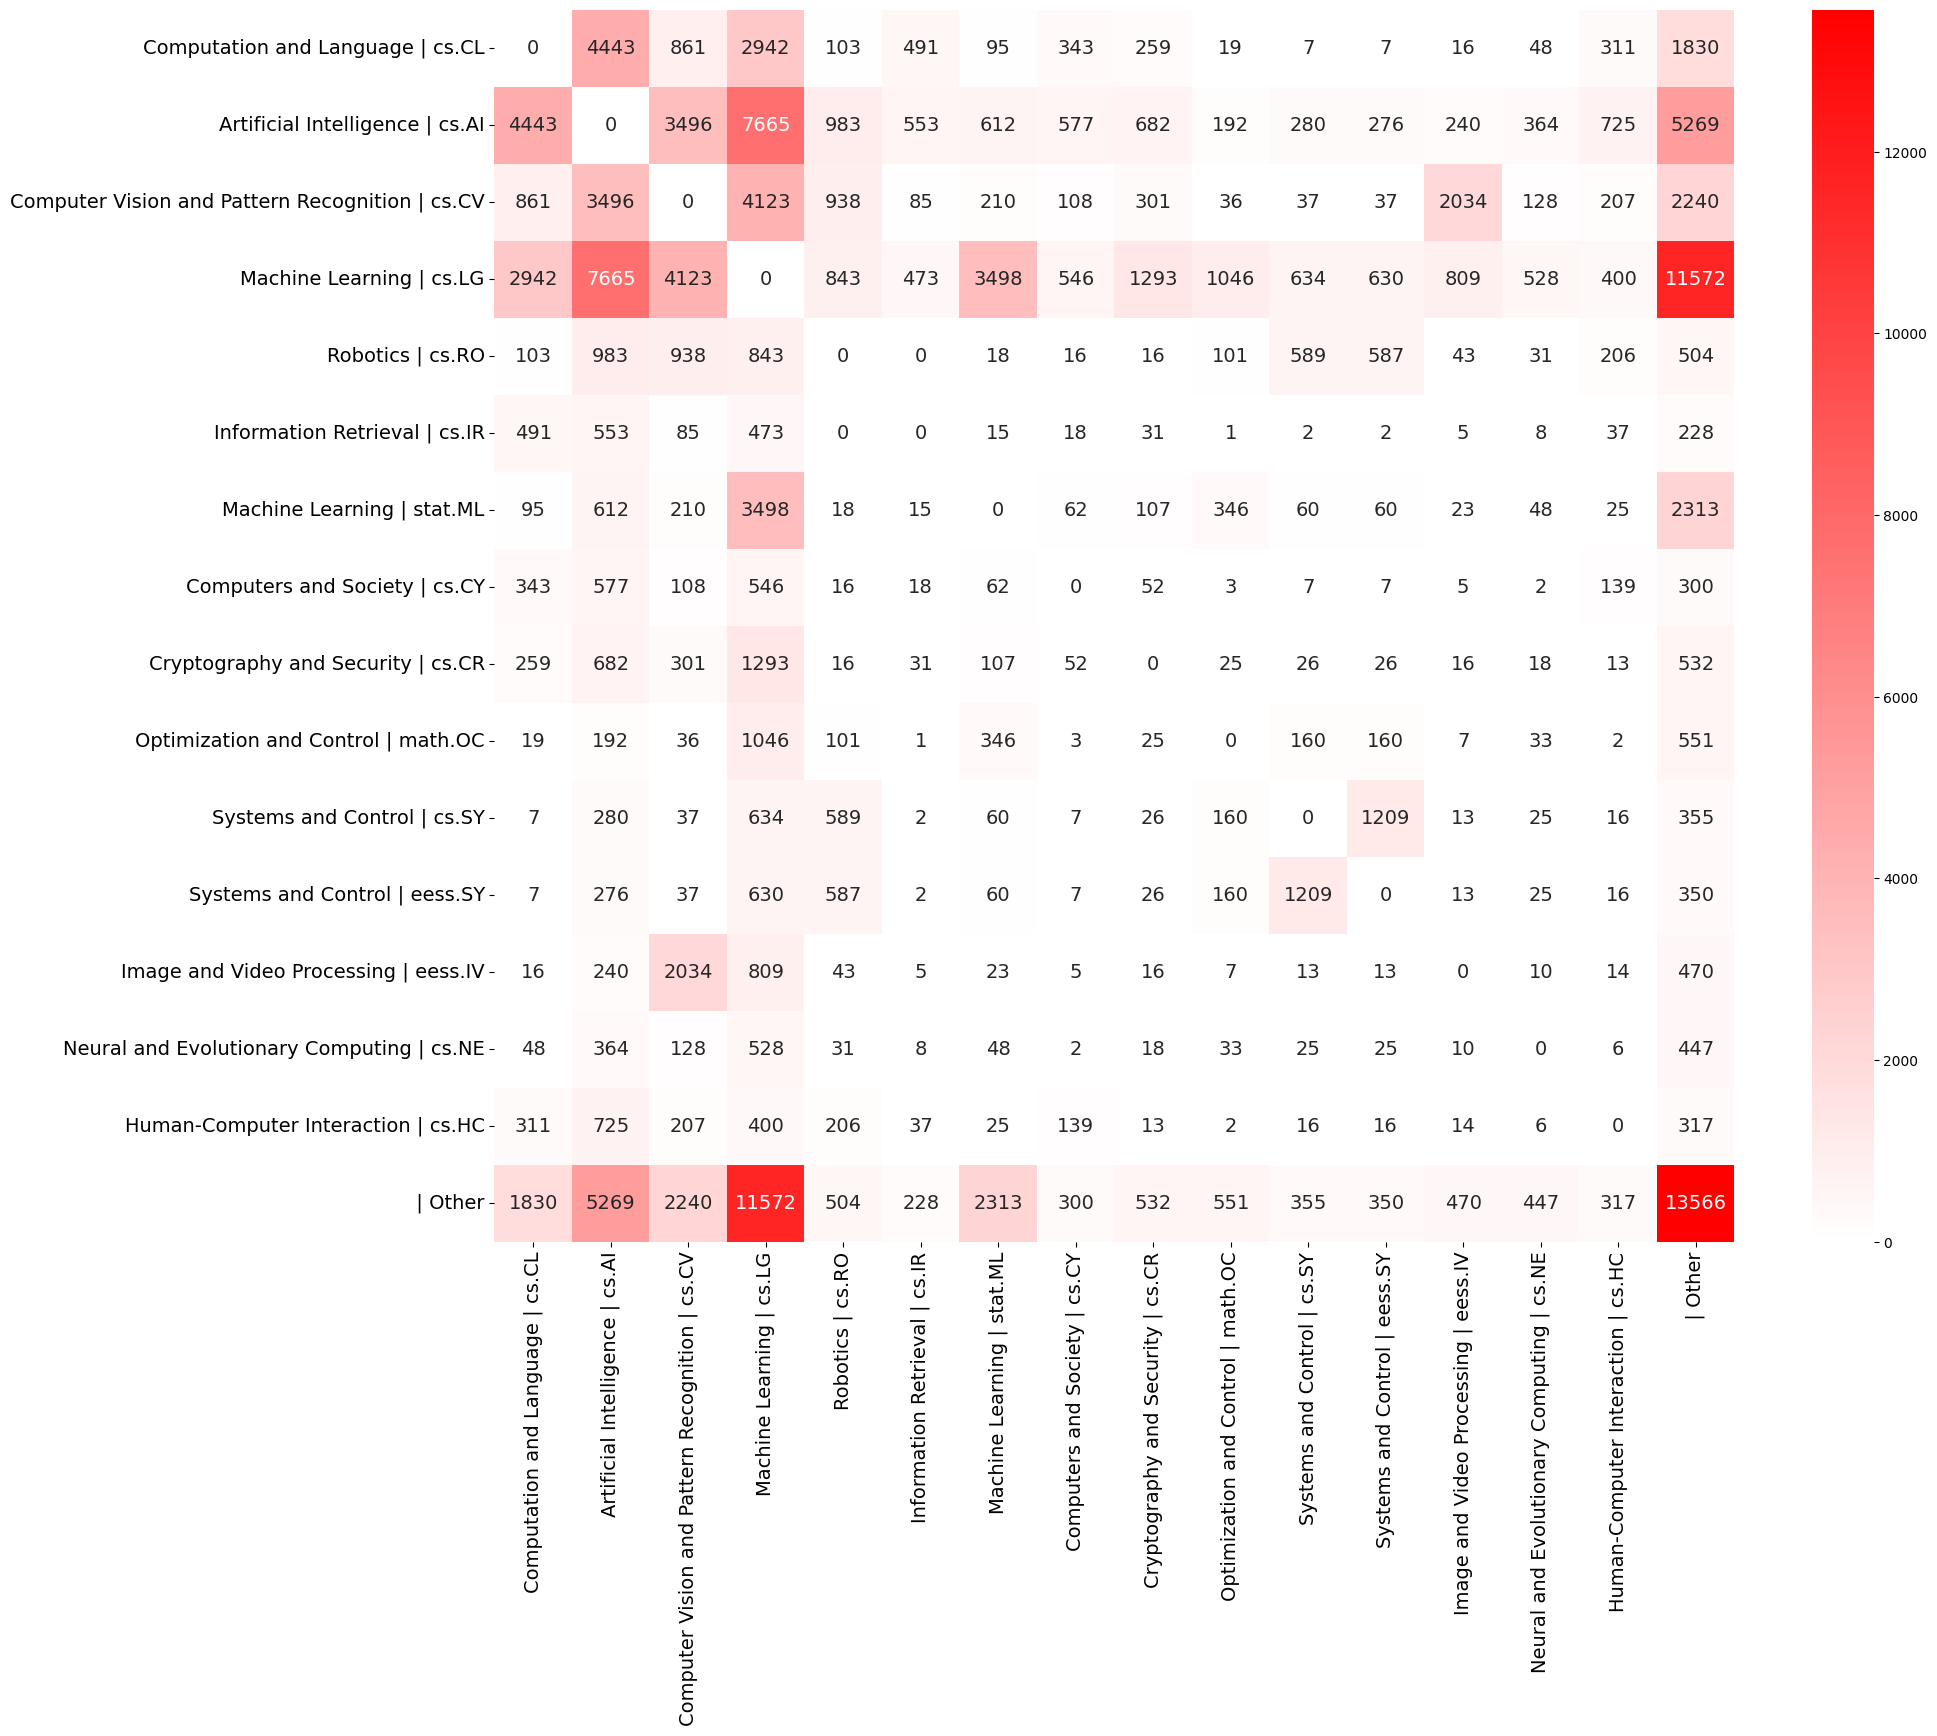

In [38]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap from white to red
N = len(above_threshold_key_list)
colors = [(1, 1, 1), (1, 0, 0)]  # White to Red
cmap_name = 'white_red'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Create a heatmap using the custom colormap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(heatmap_cat, annot=True, fmt=".0f", cmap=custom_cmap, annot_kws={"fontsize": 14})

plt.xticks(np.arange(N) + 0.5, [ topics_name[f] + " | " + f for f in above_threshold_key_list] , fontsize=14, rotation=90)
plt.yticks(np.arange(N) + 0.5, [ topics_name[f] + " | " + f for f in above_threshold_key_list], fontsize=14. , rotation=0)

# Add color bar
# plt.colorbar(heatmap)

# # Add legend for above_threshold_key_list
# legend_elements = [Patch(facecolor=heatmap.get_cmap()(0.0), edgecolor='w', label=above_threshold_key_list[0]),
#                    Patch(facecolor=heatmap.get_cmap()(1.0), edgecolor='w', label=above_threshold_key_list[-1])]

# plt.legend(handles=legend_elements, loc='upper right', title='Legend')


# Add a title
# plt.title('Heatmap of N x N Matrix')

# Display the heatmap
plt.show()
